# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "VAE"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'VAE',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.613  1  1.157 0.284 0.006   
                             age        0.099  1  0.187 0.666 0.001   
                             Kiel       1.870  1  3.526 0.062 0.018   
                             Magdeburg  3.990  1  7.523 0.007 0.038   
                             Sweden     6.174  1 11.640 0.001 0.057   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.612  1  0.623 0.431 0.003   
                             age        2.031  1  2.066 0.152 0.011   
                             Kiel       0.086  1  0.088 0.768 0.000   
                             Magdeburg  1.941  1  1.975 0.162 0.010   
                             Sweden    17.261  1 17.558 0.000 0.084   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.547  0.446    False  
                             age               0.177  0.782    False  
                             Kiel              1.208  0.144    False  
                             Magdeburg         2.176  0.024     True  
                             Sweden            3.103  0.004     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.366  0.590    False  
                             age               0.817  0.284    False  
                             Kiel              0.115  0.856    False  
                             Magdeburg         0.792  0.296    False  
                             Sweden            4.371  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                     VAE                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         1.025  1  7.506 0.007 0.038   
                             age        0.007  1  0.049 0.825 0.000   
                             Kiel       0.267  1  1.957 0.163 0.010   
                             Magdeburg  0.466  1  3.411 0.066 0.018   
                             Sweden     1.686  1 12.347 0.001 0.061   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         2.052  1  4.185 0.042 0.021   
                             age        0.561  1  1.144 0.286 0.006   
                             Kiel       2.409  1  4.913 0.028 0.025   
                             Magdeburg  1.969  1  4.016 0.046 0.021   
                             Sweden    18.287  1 37.291 0.000 0.163   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.172  0.019     True  
                             age               0.084  0.883    False  
                             Kiel              0.787  0.267    False  
                             Magdeburg         1.178  0.129    False  
                             Sweden            3.259  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.375  0.089    False  
                             age               0.544  0.413    False  
                             Kiel              1.555  0.063    False  
                             Magdeburg         1.333  0.096    False  
                             Sweden            8.254  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.284         0.547  0.446    False   
                             age       0.666         0.177  0.782    False   
                             Kiel      0.062         1.208  0.144    False   
                             Magdeburg 0.007         2.176  0.024     True   
                             Sweden    0.001         3.103  0.004     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.431         0.366  0.590    False   
                             age       0.152         0.817  0.284    False   
                             Kiel      0.768         0.115  0.856    False   
                             Magdeburg 0.162         0.792  0.296    False   
                             Sweden    0.000         4.371  0.000     True   

model                                    VAE                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.007         2.172  0.019     True  
                             age       0.825         0.084  0.883    False  
                             Kiel      0.163         0.787  0.267    False  
                             Magdeburg 0.066         1.178  0.129    False  
                             Sweden    0.001         3.259  0.002     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.042         1.375  0.089    False  
                             age       0.286         0.544  0.413    False  
                             Kiel      0.028         1.555  0.063    False  
                             Magdeburg 0.046         1.333  0.096    False  
                             Sweden    0.000         8.254  0.000     True  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'VAE': 'VAE'}

## Describe scores

In [10]:
scores.describe()

model        PI                               VAE                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.260         2.475     0.337     0.223         3.326     0.276
std       0.302         5.303     0.330     0.293         6.222     0.320
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.332     0.014     0.000         0.408     0.002
50%       0.119         0.923     0.239     0.057         1.242     0.114
75%       0.466         2.445     0.621     0.391         3.338     0.521
max       1.000       147.179     1.000     1.000        85.234     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.284         0.547   
A0A024R0T9;K7ER74;P02655                           AD     0.052         1.285   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.098         1.009   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.502         0.299   
A0A075B6H7                                         AD     0.154         0.813   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.060         1.225   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.268         0.572   
S4R3U6                                             AD     0.431         0.366   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.446    False   
A0A024R0T9;K7ER74;P02655                           AD      0.125    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.206    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.652    False   
A0A075B6H7                                         AD      0.286    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.315    False   
Q9Y6X5                                             AD      0.140    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.182    False   
Q9Y6Y9                                             AD      0.429    False   
S4R3U6                                             AD      0.590    False   

model                                                       VAE                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.007         2.172   
A0A024R0T9;K7ER74;P02655                           AD     0.032         1.493   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.313         0.505   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.253         0.597   
A0A075B6H7                                         AD     0.003         2.463   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.237         0.625   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.463         0.335   
S4R3U6                                             AD     0.042         1.375   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.019     True  
A0A024R0T9;K7ER74;P02655                           AD      0.071    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.442    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.376    False  
A0A075B6H7                                         AD      0.011     True  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                               VAE                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.255         1.401     0.338     0.239         1.594     0.299
std       0.291         1.638     0.317     0.293         1.841     0.316
min       0.000         0.001     0.000     0.000         0.000     0.000
25%       0.011         0.357     0.037     0.007         0.372     0.020
50%       0.126         0.900     0.248     0.088         1.058     0.163
75%       0.439         1.943     0.598     0.425         2.151     0.555
max       0.997        22.880     0.998     0.999        21.513     1.000

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,VAE
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1027,940


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.284         0.547  0.446   
A0A024R0T9;K7ER74;P02655                           0.052         1.285  0.125   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.098         1.009  0.206   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.502         0.299  0.652   
A0A075B6H7                                         0.154         0.813  0.286   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.315   
Q9Y6X5                                             0.060         1.225  0.140   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.182   
Q9Y6Y9                                             0.268         0.572  0.429   
S4R3U6                                             0.431         0.366  0.590   

                                                              VAE  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.007   
A0A024R0T9;K7ER74;P02655                              False 0.032   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.313   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.253   
A0A075B6H7                                            False 0.003   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.237   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.463   
S4R3U6                                                False 0.042   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               2.172  0.019   
A0A024R0T9;K7ER74;P02655                                   1.493  0.071   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.505  0.442   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.597  0.376   
A0A075B6H7                                                 2.463  0.011   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.282   
Q9Y6X5                                                     0.625  0.358   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.156   
Q9Y6Y9                                                     0.335  0.588   
S4R3U6                                                     1.375  0.089   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                           True       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                             True        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - VAE (no)    882
PI (yes) - VAE (yes)   336
PI (no)  - VAE (yes)   145
PI (yes) - VAE (no)     58
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.284         0.547  0.446   
A0A075B6H7                                         0.154         0.813  0.286   
A0A075B6I0                                         0.024         1.627  0.067   
A0A075B6J9                                         0.112         0.951  0.228   
A0A075B6Q5                                         0.694         0.158  0.804   
...                                                  ...           ...    ...   
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI... 0.001         2.950  0.005   
Q9UNW1                                             0.009         2.048  0.031   
Q9UP79                                             0.481         0.318  0.634   
Q9UQ52                                             0.048         1.323  0.117   
Q9Y6C2                                             0.836         0.078  0.903   

                                                              VAE  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.007   
A0A075B6H7                                            False 0.003   
A0A075B6I0                                            False 0.001   
A0A075B6J9                                            False 0.010   
A0A075B6Q5                                            False 0.006   
...                                                     ...   ...   
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI...     True 0.119   
Q9UNW1                                                 True 0.929   
Q9UP79                                                False 0.000   
Q9UQ52                                                False 0.001   
Q9Y6C2                                                False 0.010   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               2.172  0.019   
A0A075B6H7                                                 2.463  0.011   
A0A075B6I0                                                 3.166  0.003   
A0A075B6J9                                                 1.985  0.027   
A0A075B6Q5                                                 2.192  0.018   
...                                                          ...    ...   
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI...         0.923  0.208   
Q9UNW1                                                     0.032  0.955   
Q9UP79                                                     4.788  0.000   
Q9UQ52                                                     3.268  0.002   
Q9Y6C2                                                     2.010  0.026   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                           True       186  
A0A075B6H7                                             True        91  
A0A075B6I0                                             True       194  
A0A075B6J9                                             True       156  
A0A075B6Q5                                             True       104  
...                                                     ...       ...  
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI...    False       115  
Q9UNW1                                                False       171  
Q9UP79                                                 True       135  
Q9UQ52                               

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,VAE,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.446,0.019,186,PI (no) - VAE (yes)
A0A024R0T9;K7ER74;P02655,0.125,0.071,195,PI (no) - VAE (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.206,0.442,174,PI (no) - VAE (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.652,0.376,196,PI (no) - VAE (no)
A0A075B6H7,0.286,0.011,91,PI (no) - VAE (yes)
...,...,...,...,...
Q9Y6R7,0.315,0.282,197,PI (no) - VAE (no)
Q9Y6X5,0.140,0.358,173,PI (no) - VAE (no)
Q9Y6Y8;Q9Y6Y8-2,0.182,0.156,197,PI (no) - VAE (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,VAE,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
A0A087X1Z2;C9JTV4;H0Y4Y4;Q8WYH2;Q96C19;Q9BUP0;Q9BUP0-2,0.001,0.997,66,PI (yes) - VAE (no),0.996
P17302,0.982,0.000,135,PI (no) - VAE (yes),0.982
O15204;O15204-2,0.986,0.020,156,PI (no) - VAE (yes),0.966
P37802;P37802-2;X6RJP6,0.027,0.978,110,PI (yes) - VAE (no),0.951
A0A087WU43;A0A087WX17;A0A087WXI5;P12830;P12830-2,0.949,0.000,134,PI (no) - VAE (yes),0.948
...,...,...,...,...,...
Q9NX62,0.055,0.045,197,PI (no) - VAE (yes),0.011
K7ERI9;P02654,0.041,0.051,196,PI (yes) - VAE (no),0.011
P00740;P00740-2,0.053,0.042,197,PI (no) - VAE (yes),0.010


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE/diff_analysis_comparision_1_VAE


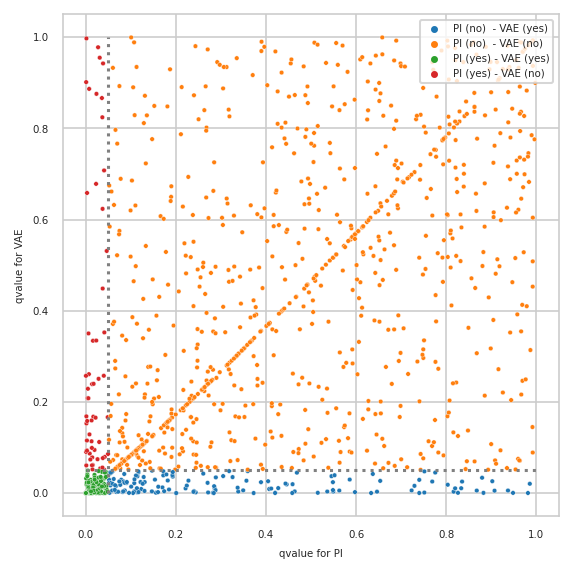

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE/diff_analysis_comparision_2_VAE


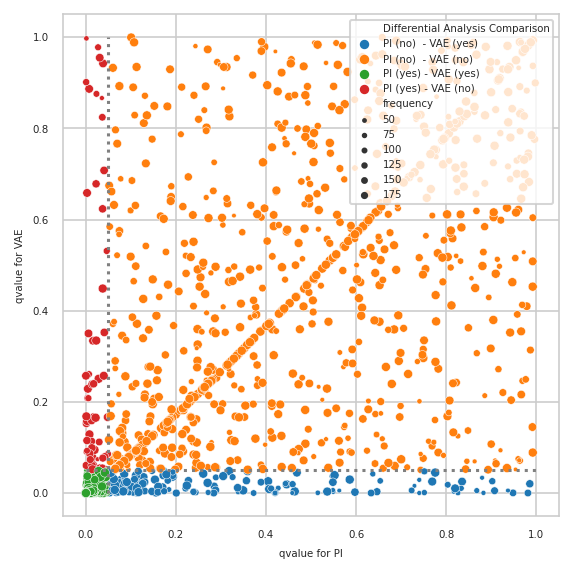

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

vaep.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
PSEN1,ENSP00000326366,5.000
APOE,ENSP00000252486,5.000
APP,ENSP00000284981,5.000
MAPT,ENSP00000340820,4.800
...,...,...
ZBTB22,ENSP00000407545,0.683
HMGN2,ENSP00000355228,0.683
PPP1R13B,ENSP00000202556,0.683


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out